In [2]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input 
from sklearn.metrics import classification_report


In [3]:
file_path="E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train"

In [4]:
name_calss= os.listdir(file_path)

In [5]:
name_calss

['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

In [15]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [16]:
filepaths

['E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(0).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(1).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(10).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(100).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(101).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(102).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(103).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(104).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(105).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(106).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVID19(107).jpg',
 'E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis)/train\\COVID19\\COVI

In [17]:
labels= list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'COVID19',
 'CO

In [20]:
filepath = pd.Series(filepaths, name='Filepath').astype(str) 
labels = pd.Series (labels, name='Label') 
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True) 
data.head(5)


,Filepath,Label
0,"E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis...",PNEUMONIA
1,"E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis...",PNEUMONIA
2,"E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis...",PNEUMONIA
3,"E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis...",PNEUMONIA
4,"E:/Chest X-Ray (Pneumonia,Covid19,Tuberculosis...",COVID19


In [22]:
data["Label"].value_counts()

Label
PNEUMONIA        3875
NORMAL           1341
TURBERCULOSIS     650
COVID19           460
Name: count, dtype: int64

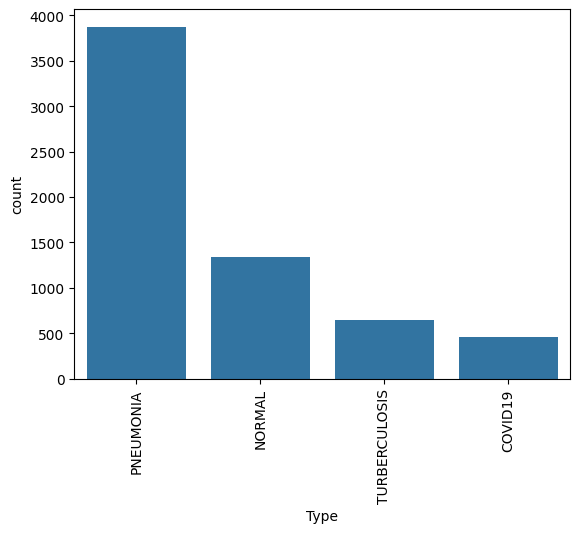

In [23]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);


In [25]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

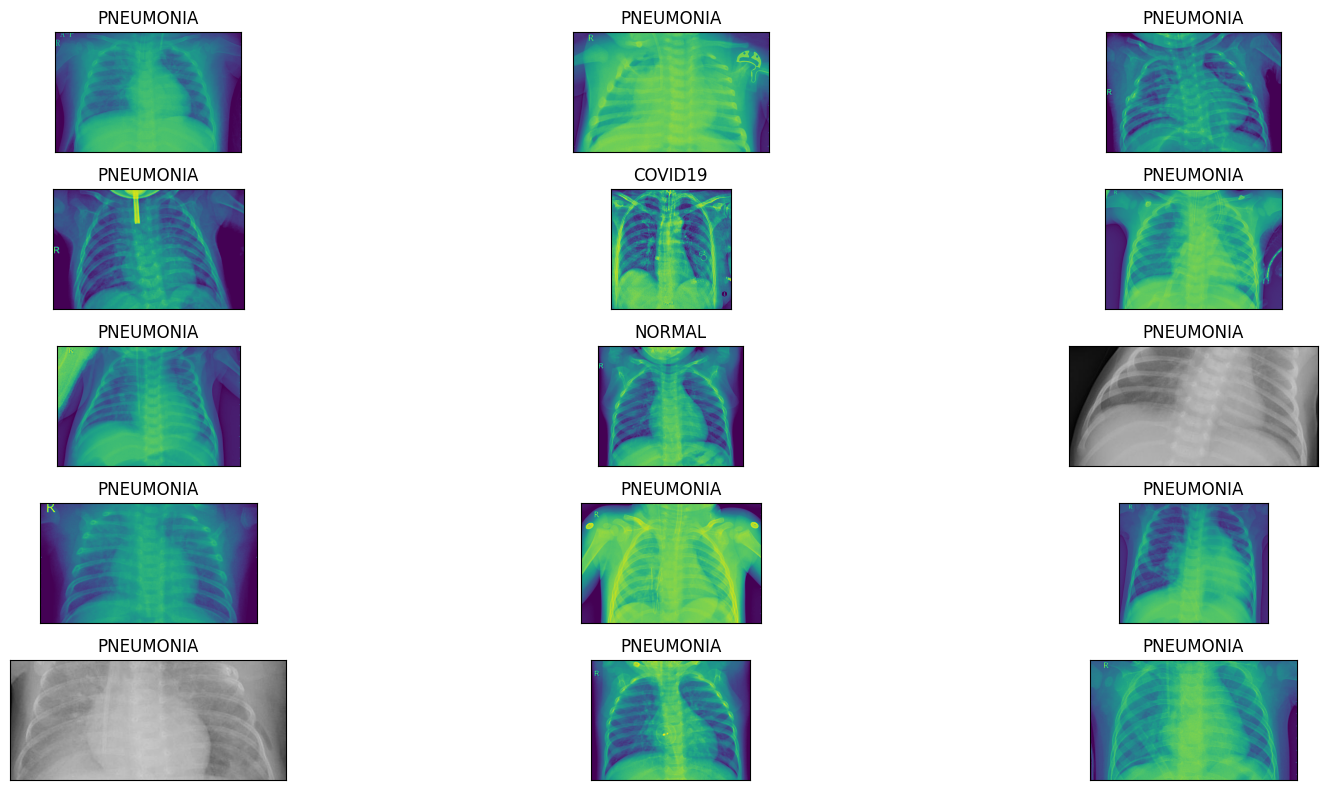

In [27]:
fig, axes = plt.subplots (nrows=5, ncols=3, figsize=(18,8), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()


In [32]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,validation_split=0.2)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


In [46]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen= train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath', 
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen= test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col ='Label', 
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)


Found 4744 validated image filenames belonging to 4 classes.
Found 1582 validated image filenames belonging to 4 classes.
Found 1582 validated image filenames belonging to 4 classes.


In [48]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling ='avg'
)
pretrained_model.trainable = False




94765736/94765736 [==============================] - 110s 1us/step


In [51]:
inputs= pretrained_model.input

x = Dense (128, activation='relu')(pretrained_model.output) 
x =Dense (128, activation= 'relu') (x)

outputs = Dense(4, activation='softmax')(x)

model= Model (inputs= inputs, outputs =outputs)


In [54]:
model.compile(
    optimizer ='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [59]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',
                                min_delta=0,
                                patience=2,
                                mode='auto')]


In [60]:
history=model.fit(
	train_gen,
	validation_data=valid_gen,
	epochs =10,
	callbacks = my_callbacks
)

Epoch 1/10


149/149 [==============================] - 475s 3s/step - loss: 0.2449 - accuracy: 0.9148 - val_loss: 0.1519 - val_accuracy: 0.9381
Epoch 2/10
149/149 [==============================] - 247s 2s/step - loss: 0.1127 - accuracy: 0.9593 - val_loss: 0.1421 - val_accuracy: 0.9381
Epoch 3/10
149/149 [==============================] - 193s 1s/step - loss: 0.0781 - accuracy: 0.9728 - val_loss: 0.2074 - val_accuracy: 0.9381


In [62]:
model.save("model_restnet50.h5")

C:\Users\rsanc\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


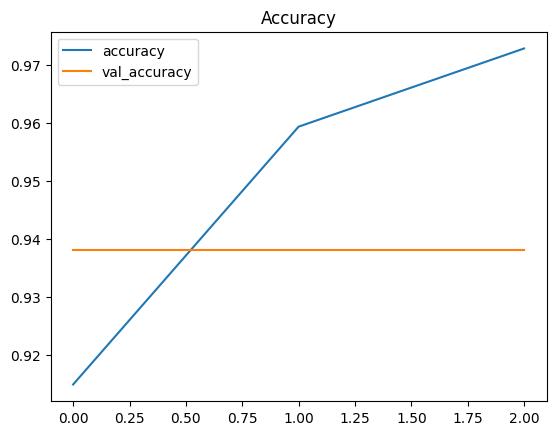

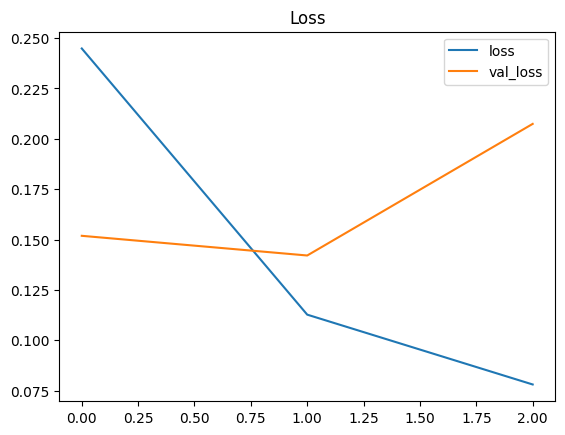

In [63]:
pd.DataFrame(history.history) [['accuracy', 'val_accuracy']].plot() 
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history) [['loss', 'val_loss']].plot() 
plt.title("Loss") 
plt.show()


In [66]:
results = model.evaluate(test_gen, verbose=0)

print(" Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]* 100))


 Test Loss: 0.20743
Test Accuracy: 93.81%


In [67]:
pred = model.predict(test_gen)
pred =np.argmax(pred, axis=1)

labels =(train_gen.class_indices)
labels= dict((v,k) for k,v in labels.items())
pred= [labels[k] for k in pred]


50/50 [==============================] - 30s 579ms/step


In [68]:
y_test = list(test. Label)
print(classification_report(y_test, pred))


               precision    recall  f1-score   support

      COVID19       0.64      0.97      0.77       106
       NORMAL       0.94      0.91      0.92       338
    PNEUMONIA       0.98      0.95      0.97       967
TURBERCULOSIS       0.98      0.90      0.94       171

     accuracy                           0.94      1582
    macro avg       0.89      0.93      0.90      1582
 weighted avg       0.95      0.94      0.94      1582



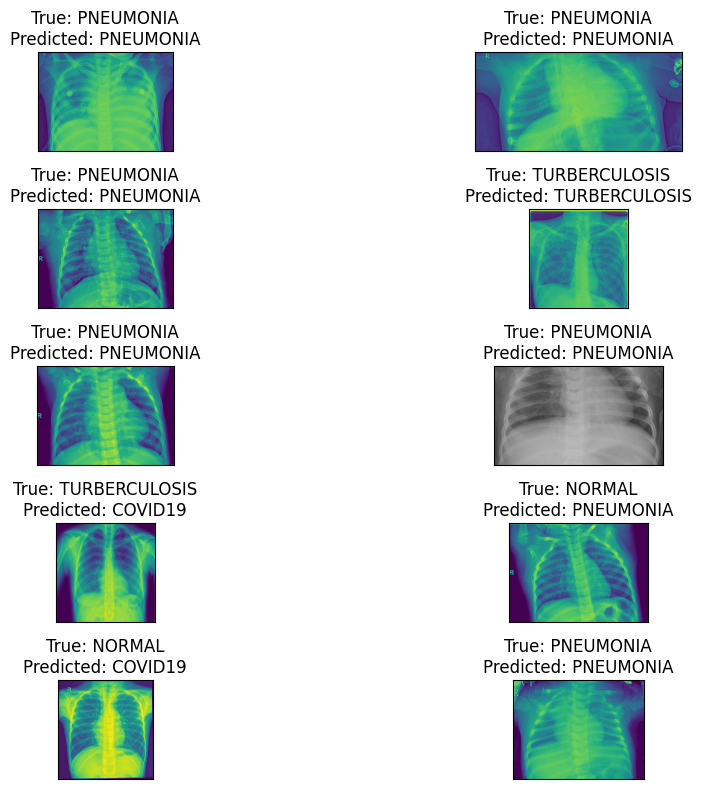

In [70]:
fig, axes = plt.subplots (nrows=5, ncols=2, figsize=(12, 8),
                            subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()


In [102]:
import cv2
import numpy as np
from matplotlib.pyplot import imread 
from matplotlib.pyplot import imshow 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions 
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path='E:\Chest X-Ray (Pneumonia,Covid19,Tuberculosis)\COVID19(460).jpg'

img = cv2.imread(img_path)
img = cv2.resize(img,  (100,  100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result= model.predict(x)
print((result* 100).astype('int'))


1/1 [==============================] - 0s 180ms/step
[[99  0  0  0]]
